In [2]:
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
mydata = pd.read_excel('Датасет_Выявление факторов, влияющих на незавершение корзины в онлайн-магазинах косметики и парфюмерии (2).xlsx')
mydata = mydata.drop(columns=["Отметка времени", "Column 62"])
mydata

,"Укажите, пожалуйста, ваш пол","Укажите, пожалуйста, ваш возраст",Укажите ваше образование,Какая из приведенных ниже оценок наиболее точно характеризует материальное положение вашей семьи?,Укажите ваш семейный статус,Есть ли у вас дети?,В каком субъекте России вы проживаете?,"Укажите, пожалуйста, размер населенного пункта, где вы проживаете","Как часто вы оставляете товары в корзине в онлайн-магазине косметики и парфюмерии, не покупая их?",Столбец 12,...,Я не хочу заполнять много пунктов для оформления заказа и доставки,Столбец 100,Заполнение данных во время оформления заказа кажется мне утомительным,Столбец 102,"Я беспокоюсь, что магазин может украсть мою личную информацию",Столбец 104,"Я беспокоюсь, что продавец может поделиться информацией обо мне с третьими лицами",Столбец 106,Конфиденциальность в Интернете важна для меня,Столбец 108
0,Женский,18-25,Незаконченное высшее образование,"Денег достаточно, чтобы вообще ни в чем себе н...",Холост (не замужем),Нет,Москва,Больше 1 млн.,5,Часто,...,2,Не согласен,2,Не согласен,2,Не согласен,2,Не согласен,6,Согласен
1,Женский,старше 61,Среднее специальное образование,Денег хватает только на приобретение продуктов...,Холост (не замужем),Да,Ростовская область,Меньше 50 тыс.,5,Часто,...,6,Согласен,6,Согласен,6,Согласен,6,Согласен,6,Согласен
2,Мужской,41-45,Высшее образование,Покупка большинства товаров длительного пользо...,Женат (замужем),Да,Волгоградская область,Больше 1 млн.,3,Редко,...,6,Согласен,6,Согласен,6,Согласен,6,Согласен,6,Согласен
3,Женский,36-40,Высшее образование,Денег достаточно для приобретения необходимых ...,Женат (замужем),Да,Волгоградская область,Больше 1 млн.,5,Часто,...,7,Полностью согласен,7,Полностью согласен,7,Полностью согласен,7,Полностью согласен,7,Полностью согласен
4,Женский,18-25,Незаконченное высшее образование,"Мы можем позволить себе купить автомобиль, одн...",Холост (не замужем),Нет,Москва,Больше 1 млн.,5,Часто,...,2,Не согласен,2,Не согласен,2,Не согласен,2,Не согласен,6,Согласен
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Женский,31-35,Незаконченное высшее образование,Денег хватает только на приобретение продуктов...,Женат (замужем),Нет,Владимирская область,500 тыс. – 1 млн.,2,Очень редко,...,4,Нейтральная позиция,4,Нейтральная позиция,7,Полностью согласен,7,Полностью согласен,7,Полностью согласен
200,Женский,18-25,Высшее образование,Денег достаточно для приобретения необходимых ...,Холост (не замужем),Нет,Москва,Больше 1 млн.,6,Очень часто,...,5,Скорее согласен,5,Скорее согласен,5,Скорее согласен,5,Скорее согласен,6,Согласен
201,Женский,26-30,Высшее образование,Денег достаточно для приобретения необходимых ...,Женат (замужем),Нет,Москва,Больше 1 млн.,5,Часто,...,6,Согласен,6,Согласен,2,Не согласен,6,Согласен,4,Нейтральная позиция
202,Женский,26-30,Высшее образование,Покупка большинства товаров длительного пользо...,"Живем вместе, но официально не состоим в браке",Нет,Ивановская область,100-500 тыс.,6,Очень часто,...,5,Скорее согласен,5,Скорее согласен,1,Полностью не согласен,1,Полностью не согласен,5,Скорее согласен


In [4]:
list(mydata.columns)

['Укажите, пожалуйста, ваш пол',
 'Укажите, пожалуйста, ваш возраст',
 'Укажите ваше образование',
 'Какая из приведенных ниже оценок наиболее точно характеризует материальное положение вашей семьи?',
 'Укажите ваш семейный статус',
 'Есть ли у вас дети?',
 'В каком субъекте России вы проживаете?',
 'Укажите, пожалуйста, размер населенного пункта, где вы проживаете',
 'Как часто вы оставляете товары в корзине в онлайн-магазине косметики и парфюмерии, не покупая их?',
 'Столбец 12',
 'Как часто вы кладете товар в корзину в онлайн-магазине, но не приобретаете его за эту же сессию?',
 'Column 64',
 'Как часто вы закрываете сайт/выходите из мобильного приложения перед тем, как приобрести товары из корзины в онлайн-магазине?',
 'Column 65',
 'Как часто вы оставляете корзину в онлайн-магазине неоплаченной? ',
 'Column 66',
 'Я решаю, что лучше куплю тот же товар в офлайн-магазине вместо заказа онлайн',
 'Column 67',
 'Я добавляю и размещаю товары в корзине ради развлечения',
 'Column 68',
 '

## Подготовка данных

In [5]:
df = mydata

In [6]:
# Словарь с новыми названиями столбцов
rename_dict = {
    # 📌 Демографические переменные
    "Укажите, пожалуйста, ваш пол": "Пол",
    "Укажите, пожалуйста, ваш возраст": "Возраст",
    "Укажите ваше образование": "Образование",
    "Какая из приведенных ниже оценок наиболее точно характеризует материальное положение вашей семьи?": "Материальное положение",
    "Укажите ваш семейный статус": "Семейное положение",
    "Есть ли у вас дети?": "Дети",
    "В каком субъекте России вы проживаете?": "Регион",
    "Укажите, пожалуйста, размер населенного пункта, где вы проживаете": "Размер города",

    # 📌 Частотные шкалы
    "Как часто вы оставляете товары в корзине в онлайн-магазине косметики и парфюмерии, не покупая их?": "Частота - Оставляю товары в корзине",
    "Как часто вы кладете товар в корзину в онлайн-магазине, но не приобретаете его за эту же сессию?": "Частота - Не покупаю за ту же сессию",
    "Как часто вы закрываете сайт/выходите из мобильного приложения перед тем, как приобрести товары из корзины в онлайн-магазине?": "Частота - Закрываю сайт перед покупкой",
    "Как часто вы оставляете корзину в онлайн-магазине неоплаченной? ": "Частота - Корзина остаётся неоплаченной",

    # 📌 Факторы отказа (1-20)
    "Я решаю, что лучше куплю тот же товар в офлайн-магазине вместо заказа онлайн": "Фактор 1 - Покупка в офлайн-магазине",
    "Я добавляю и размещаю товары в корзине ради развлечения": "Фактор 2 - Добавляю в корзину ради развлечения",
    "Я добавляю и размещаю товары в корзине, когда мне скучно": "Фактор 3 - Добавляю в корзину от скуки",
    "Я размещаю товары в корзине, чтобы легче оценить узкий набор вариантов": "Фактор 4 - Использую корзину для сравнения",
    "Я считаю, что смогу найти более выгодные цены в другом интернет-магазине": "Фактор 5 - Ищу лучшую цену в интернете",
    "Я считаю, что смогу найти более выгодные цены в офлайн-магазине": "Фактор 6 - Ищу лучшую цену в офлайн-магазине",
    "Мне неловко заказывать курьерскую доставку всего одного продукта/небольшого количества продуктов": "Фактор 7 - Неловко заказывать один товар",
    "Я получу большее удовольствие, если закажу больше товаров за раз, поэтому планирую добрать корзину": "Фактор 8 - Добираю корзину ради объёма",
    "Я часто добавляю дополнительные товары, чтобы избежать заказа одного продукта": "Фактор 9 - Добавляю товары, чтобы не заказывать один",
    "Я откладываю покупки, если не могу достичь порога бесплатной доставки": "Фактор 10 - Откладываю покупку из-за стоимости доставки",
    "Заказ одного товара кажется мне неоправданным по стоимости доставки": "Фактор 11 - Один товар дорого доставлять",
    "Я планирую добрать товары до общей суммы, необходимой для применения промокода/акции ": "Фактор 12 - Добираю товары ради акции",
    "Я не хочу совершать импульсивную покупку, и мне нужно время ее обдумать": "Фактор 13 - Избегаю импульсивных покупок",
    "Мне нужно понять, что всё, что я положил(а) в корзину мне действительно нужно": "Фактор 14 - Проверяю необходимость товаров",
    "Мне нужно время, чтобы понять, какие еще товары я могу приобрести ": "Фактор 15 - Нужно время на выбор товаров",
    "Я предпочитаю сравнить товары перед завершением заказа": "Фактор 16 - Сравниваю товары перед покупкой",
    "Я решаю подождать, когда появится выгодный промокод/скидка ": "Фактор 17 - Ожидаю скидку/промокод",
    "Я не покупаю товары сразу, если знаю, что впереди может быть акция": "Фактор 18 - Ожидаю распродажу",
    "Я решаю подождать, когда снизится цена на товар": "Фактор 19 - Жду снижения цены",
    "Я предпочитаю совершать покупки только тогда, когда могу использовать промокод": "Фактор 20 - Покупаю только с промокодом",

    # 📌 Факторы доступности и удобства
    "Я не понимаю условий текущих акций, из-за чего откладываю заказ": "Фактор 21 - Не понимаю условия акции",
    "Мне нужно дополнительное время, чтобы разобраться в условиях акции, добрать товары и завершить покупку": "Фактор 22 - Нужно время на изучение акции",
    "Я часто откладываю покупку до момента появления в наличии нужного мне товара ": "Фактор 23 - Жду, когда товар появится в наличии",
    "Необходимые мне товары часто снимаются с продажи, из-за чего мне приходится искать альтернативу ": "Фактор 24 - Приходится искать альтернативу",
    "Мне нужно много времени, чтобы тщательно изучить ассортимент товаров ": "Фактор 25 - Нужно много времени на изучение ассортимента",
    "Меня утомляет долгое изучение ассортимента товаров, и я откладываю их просмотр до следующего сеанса ": "Фактор 26 - Утомляет изучение ассортимента",
    "Мне обычно сложно быстро найти необходимый товар, без которого я не могу завершить покупку ": "Фактор 27 - Сложно найти необходимый товар",
    "Сумма заказа превышает баланс моей банковской карты, поэтому я откладываю покупку": "Фактор 28 - Баланс карты не позволяет оплату",
    "У меня есть финансовая возможность оплатить заказ сразу, но я уже спланировал(а) имеющийся бюджет на другие нужды": "Фактор 29 - Бюджет спланирован на другие нужды",
    "Я хочу оформить заказ после получения дохода, чтобы трата была менее ощутимой": "Фактор 30 - Ожидаю поступления дохода",
    "Из-за технических проблем я не могу оформить заказ и выхожу из онлайн-магазина, чтобы оформить его позже": "Фактор 31 - Технические проблемы мешают оплате",
    "Из-за технических проблем я не могу оформить заказ и пишу в поддержку": "Фактор 32 - Технические проблемы, пишу в поддержку",
    "Я хочу оформить заказ прямо перед мероприятием (например, перед праздником), к которому он мне нужен": "Фактор 33 - Хочу оформить перед мероприятием",
    "Я не оформляю заказ, так как на одном из этапов сбора / оформления корзины меня отвлекают окружающие люди ": "Фактор 34 - Отвлекают окружающие люди",
    "Я не оформляю заказ, так как на одном из этапов сбора / оформления корзины я отвлекаюсь на другой вид деятельности": "Фактор 35 - Отвлекаюсь на другой вид деятельности",
    "Я не оформляю заказ, так как у сервиса нет подходящих мне временных промежутков доставки": "Фактор 36 - Нет подходящих временных промежутков доставки",
    "Я не оформляю заказ, так как магазин не доставляет заказы в мой регион / город / населенный пункт ": "Фактор 37 - Не доставляют заказы в мой регион",
    "Я не оформляю заказ, так как у сервиса нет курьерской доставки, которая наиболее предпочтительна для меня": "Фактор 38 - Нет удобной курьерской доставки",
    "Я не оформляю заказ, так как у сервиса нет пунктов самовывоза заказов, что для меня наиболее предпочтительный способ получения ": "Фактор 39 - Нет ПВЗ",
    "Я не хочу авторизоваться на сайте /  в приложении магазина, из-за чего не могу оформить заказ": "Фактор 40 - Не хочу авторизоваться",
    "Я не хочу заполнять много пунктов для оформления заказа и доставки": "Фактор 41 - Слишком много шагов при заказе",
    "Заполнение данных во время оформления заказа кажется мне утомительным": "Фактор 42 - Заполнение данных утомительно",
    "Я беспокоюсь, что магазин может украсть мою личную информацию": "Фактор 43 - Беспокоюсь за персональные данные",
    "Я беспокоюсь, что продавец может поделиться информацией обо мне с третьими лицами": "Фактор 44 - Опасаюсь утечки данных",
    "Конфиденциальность в Интернете важна для меня": "Фактор 45 - Важно сохранить конфиденциальность",
    #качественные столбцы (никогда-всегда, не согласен-согласен)
    "Столбец 12": "Частота - Оставляю товары в корзине (кач)",
    "Column 64": "Частота - Не покупаю за ту же сессию (кач)",
    "Column 65": "Частота - Закрываю сайт перед покупкой (кач)",
    "Column 66": "Частота - Корзина остаётся неоплаченной (кач)",
    "Column 67": "Фактор 1 (кач)",
    "Column 68": "Фактор 2 (кач)",
    "Column 69": "Фактор 3 (кач)",
    "Column 70": "Фактор 4 (кач)",
    "Column 71": "Фактор 5 (кач)",
    "Column 72": "Фактор 6 (кач)",
    "Столбец 32": "Фактор 7 (кач)",
    "Столбец 34": "Фактор 8 (кач)",
    "Столбец 36": "Фактор 9 (кач)",
    "Column 76": "Фактор 10 (кач)",
    "Column 77": "Фактор 11 (кач)",
    "Column 78": "Фактор 12 (кач)",
    "Column 79": "Фактор 13 (кач)",
    "Column 80": "Фактор 14 (кач)",
    "Column 81": "Фактор 15 (кач)",
    "Column 82": "Фактор 16 (кач)",
    "Column 83": "Фактор 17 (кач)",
    "Column 84": "Фактор 18 (кач)",
    "Column 85": "Фактор 19 (кач)",
    "Столбец 58": "Фактор 20 (кач)",
    "Column 87": "Фактор 21 (кач)",
    "Column 88": "Фактор 22 (кач)",
    "Столбец 64": "Фактор 23 (кач)",
    "Столбец 66": "Фактор 24 (кач)",
    "Столбец 68": "Фактор 25 (кач)",
    "Столбец 70": "Фактор 26 (кач)",
    "Столбец 72": "Фактор 27 (кач)",
    "Column 94": "Фактор 28 (кач)",
    "Column 95": "Фактор 29 (кач)",
    "Column 96": "Фактор 30 (кач)",
    "Column 97": "Фактор 31 (кач)",
    "Column 98": "Фактор 32 (кач)",
    "Column 99": "Фактор 33 (кач)",
    "Column 100": "Фактор 34 (кач)",
    "Column 101": "Фактор 35 (кач)",
    "Column 102": "Фактор 36 (кач)",
    "Column 110": "Фактор 37 (кач)",
    "Столбец 94": "Фактор 38 (кач)",
    "Столбец 96": "Фактор 39 (кач)",
    "Столбец 98": "Фактор 40 (кач)",
    "Столбец 100": "Фактор 41 (кач)",
    "Столбец 102": "Фактор 42 (кач)",
    "Столбец 104": "Фактор 43 (кач)",
    "Столбец 106": "Фактор 44 (кач)",
    "Столбец 108": "Фактор 45 (кач)"
}


# Переименовываем столбцы в DataFrame
df = df.rename(columns=rename_dict)


In [7]:
list(df.columns)

['Пол',
 'Возраст',
 'Образование',
 'Материальное положение',
 'Семейное положение',
 'Дети',
 'Регион',
 'Размер города',
 'Частота - Оставляю товары в корзине',
 'Частота - Оставляю товары в корзине (кач)',
 'Частота - Не покупаю за ту же сессию',
 'Частота - Не покупаю за ту же сессию (кач)',
 'Частота - Закрываю сайт перед покупкой',
 'Частота - Закрываю сайт перед покупкой (кач)',
 'Частота - Корзина остаётся неоплаченной',
 'Частота - Корзина остаётся неоплаченной (кач)',
 'Фактор 1 - Покупка в офлайн-магазине',
 'Фактор 1 (кач)',
 'Фактор 2 - Добавляю в корзину ради развлечения',
 'Фактор 2 (кач)',
 'Фактор 3 - Добавляю в корзину от скуки',
 'Фактор 3 (кач)',
 'Фактор 4 - Использую корзину для сравнения',
 'Фактор 4 (кач)',
 'Фактор 5 - Ищу лучшую цену в интернете',
 'Фактор 5 (кач)',
 'Фактор 6 - Ищу лучшую цену в офлайн-магазине',
 'Фактор 6 (кач)',
 'Фактор 7 - Неловко заказывать один товар',
 'Фактор 7 (кач)',
 'Фактор 8 - Добираю корзину ради объёма',
 'Фактор 8 (кач)',
 '

In [8]:
# Список столбцов с социально-демографической информацией
sociodemographic_columns = [
    "Пол", "Возраст", "Образование", "Материальное положение",
    "Семейное положение", "Дети", "Регион", "Размер города"
]

# Датасет с количественными шкалами (включая соц-дем)
df_quantitative = df[[col for col in df.columns if "(кач)" not in col]]

# Датасет с качественными шкалами (включая соц-дем)
df_qualitative = df[sociodemographic_columns + [col for col in df.columns if "(кач)" in col]]



In [9]:
print(f"Размер датасета с количественными шкалами: {df_quantitative.shape}")
print(f"Размер датасета с качественными шкалами: {df_qualitative.shape}")

Размер датасета с количественными шкалами: (204, 57)
Размер датасета с качественными шкалами: (204, 57)


In [13]:
df_quantitative_new = df_quantitative
df_quantitative_new = df_quantitative_new.drop(columns=['Регион'])

In [15]:
# Преобразуем столбец "Пол" в бинарную переменную
df_quantitative_new.loc[:, 'Пол'] = df_quantitative_new['Пол'].map({'Мужской': 0, 'Женский': 1})

# Преобразуем столбец "Возраст" в числовые значения по возрастным группам
df_quantitative_new.loc[:, 'Возраст'] = df_quantitative_new['Возраст'].map({
    'до 17': 0,
    '18-25': 1,
    '26-30': 2,
    '31-35': 3,
    '36-40': 4,
    '41-45': 5,
    '46-50': 6,
    '51-60': 7,
    'старше 61': 8
})

# Преобразуем столбец "Образование" в числовые значения по категориям
df_quantitative_new.loc[:, 'Образование'] = df_quantitative_new['Образование'].map({
    'Неполное среднее образование': 0,
    'Среднее общее образование': 1,
    'Среднее специальное образование': 2,
    'Незаконченное высшее образование': 3,
    'Высшее образование': 4,
    'Два и более высших': 5,
    'Наличие ученой степени кандидата/доктора наук': 6
})

import numpy as np

# Преобразуем столбец "Материальное положение" без учета "Затрудняюсь ответить"
df_quantitative_new['Материальное положение'] = df_quantitative_new['Материальное положение'].map({
    'Денег не хватает даже на приобретение продуктов питания': 0,
    'Денег хватает только на приобретение продуктов питания': 1,
    'Денег достаточно для приобретения необходимых продуктов и одежды, на более крупные покупки приходится откладывать': 2,
    'Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем': 3,
    'Мы можем позволить себе купить автомобиль, однако купить квартиру мы не можем': 4,
    'Денег достаточно, чтобы вообще ни в чем себе не отказывать': 5
})

# Преобразуем столбец "Семейное положение" без учета "Затрудняюсь ответить"
df_quantitative_new.loc[df_quantitative_new['Семейное положение'] == 'Затрудняюсь ответить', 'Семейное положение'] = np.nan
df_quantitative_new['Семейное положение'] = df_quantitative_new['Семейное положение'].map({
    'Холост (не замужем)': 0,
    'Женат (замужем)': 1,
    'Живем вместе, но официально не состоим в браке': 2,
    'Живем порознь, но не разведены': 3,
    'Разведен (разведена)': 4,
    'Вдовец (вдова)': 5
})

# Преобразуем столбец "Размер города" с новой последовательностью кодировки
df_quantitative_new.loc[df_quantitative_new['Размер города'] == 'Затрудняюсь ответить', 'Размер города'] = np.nan
df_quantitative_new['Размер города'] = df_quantitative_new['Размер города'].map({
    'Меньше 50 тыс.': 0,
    '50-100 тыс.': 1,
    '100-500 тыс.': 2,
    '500 тыс. – 1 млн.': 3,
    'Больше 1 млн.': 4
})
# Преобразуем столбец "Дети" в бинарную переменную
df_quantitative_new['Дети'] = df_quantitative_new['Дети'].map({
    'Да': 1,
    'Нет': 0
})


## Корелляционные матрицы

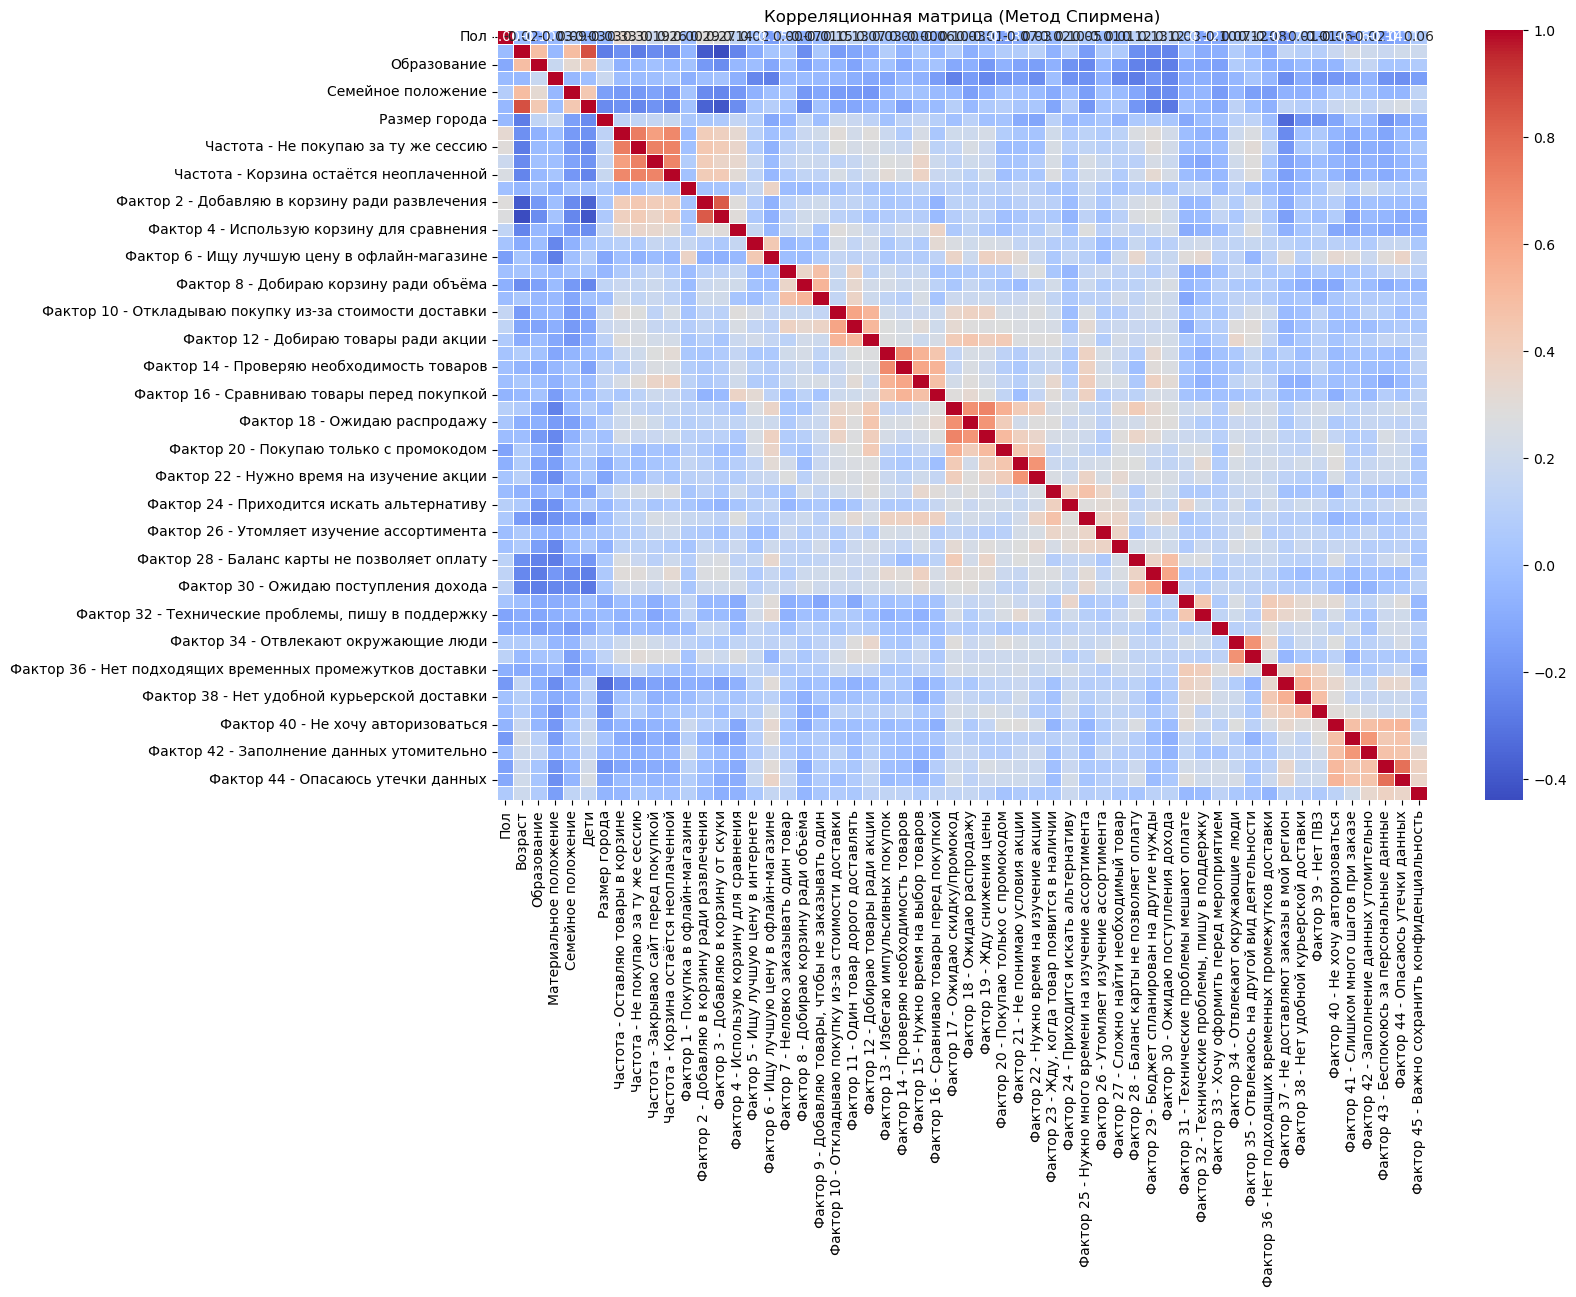

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Считаем корреляционную матрицу Спирмена для всего датасета
corr_matrix = df_quantitative_new.corr(method='spearman')

# Визуализируем корреляционную матрицу
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица (Метод Спирмена)")
plt.show()


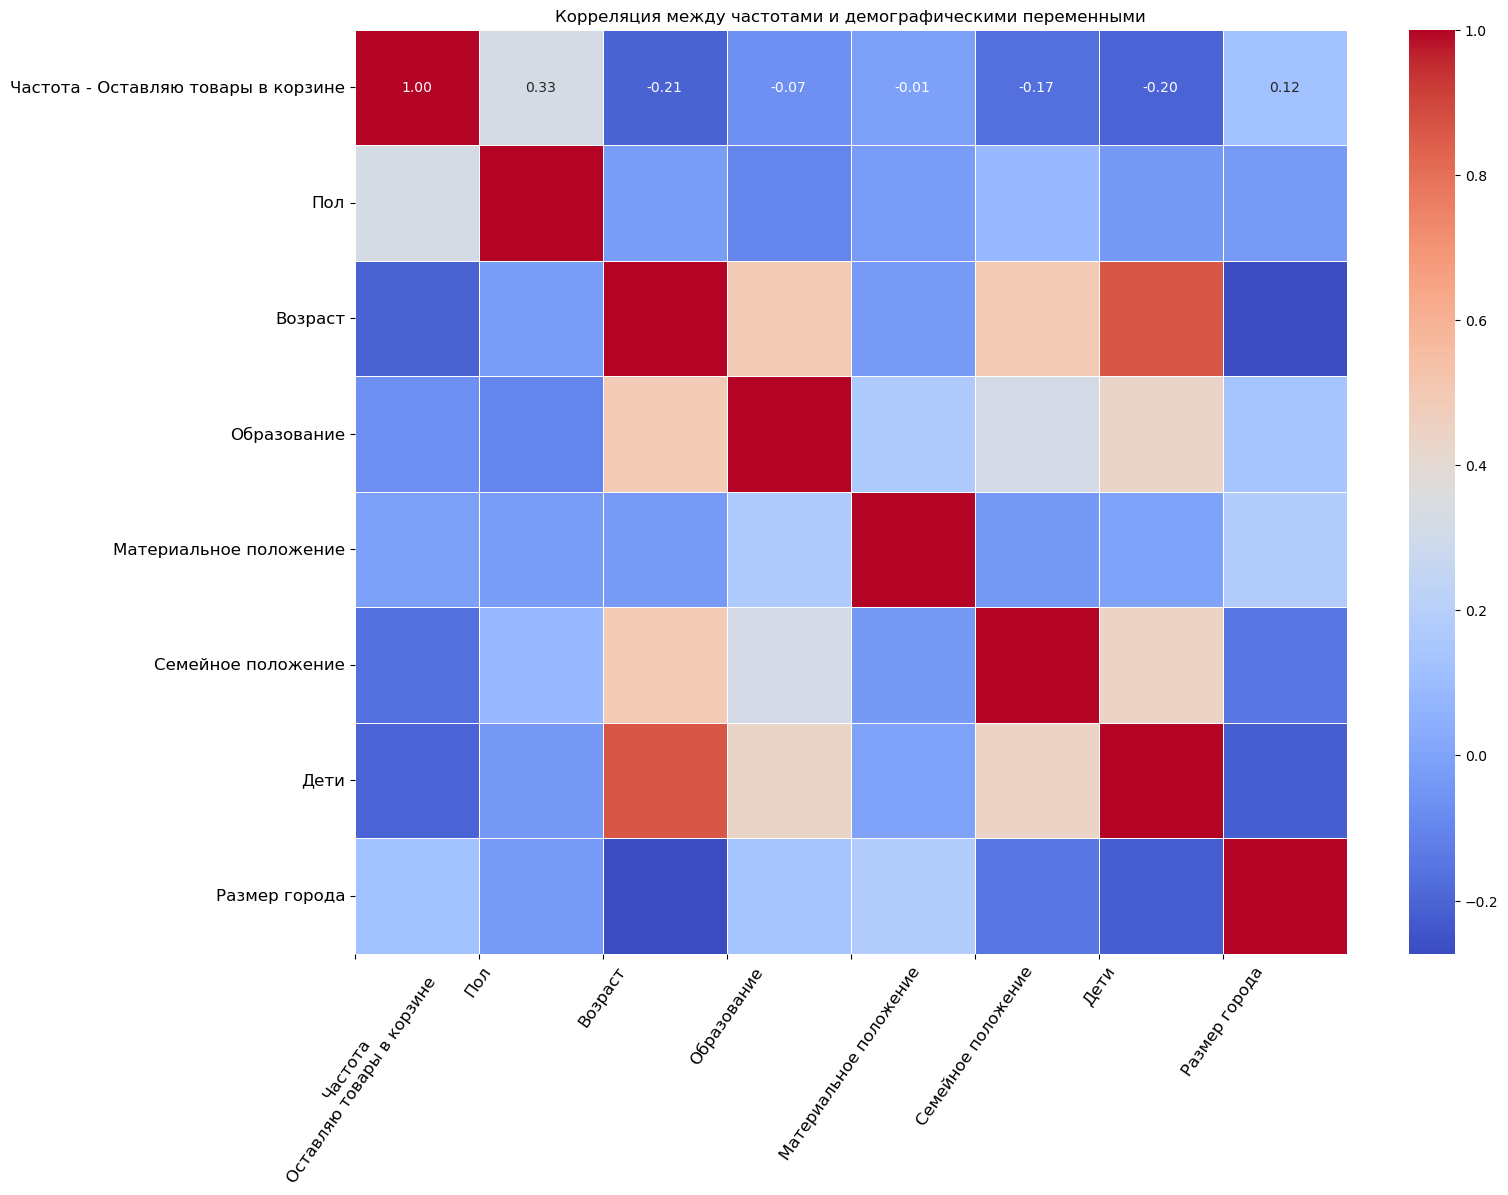

In [19]:
# Выбираем столбцы для частот (например, начинаются с 'Частота') и демографические переменные
#frequencies = [col for col in df_quantitative_new.columns if "Частота" in col]
frequencies = ['Частота - Оставляю товары в корзине']
demographics = ['Пол', 'Возраст', 'Образование', 'Материальное положение', 'Семейное положение', 'Дети', 'Размер города']

# Создаем поддатасет, чтобы рассчитать корреляцию только по этим переменным
corr_freq_demo = df_quantitative_new[frequencies + demographics].corr(method='spearman')

plt.figure(figsize=(16, 12))

# Визуализируем корреляцию
sns.heatmap(corr_freq_demo, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Добавляем заголовок
plt.title("Корреляция между частотами и демографическими переменными")
plt.xticks(fontsize=12)  # для оси X
plt.yticks(fontsize=12)  # для оси Y
plt.xticks(rotation=55)
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7], 
    labels=["Частота\nОставляю товары в корзине", 'Пол','Возраст','Образование','Материальное положение','Семейное положение','Дети','Размер города']
)

# Сохраняем график как изображение
plt.savefig(r'D:\Загрузки Chrome\correlation_factors_dem.png', dpi=300)  # Сохраняем файл с разрешением 300 dpi

# Показываем график
plt.show()


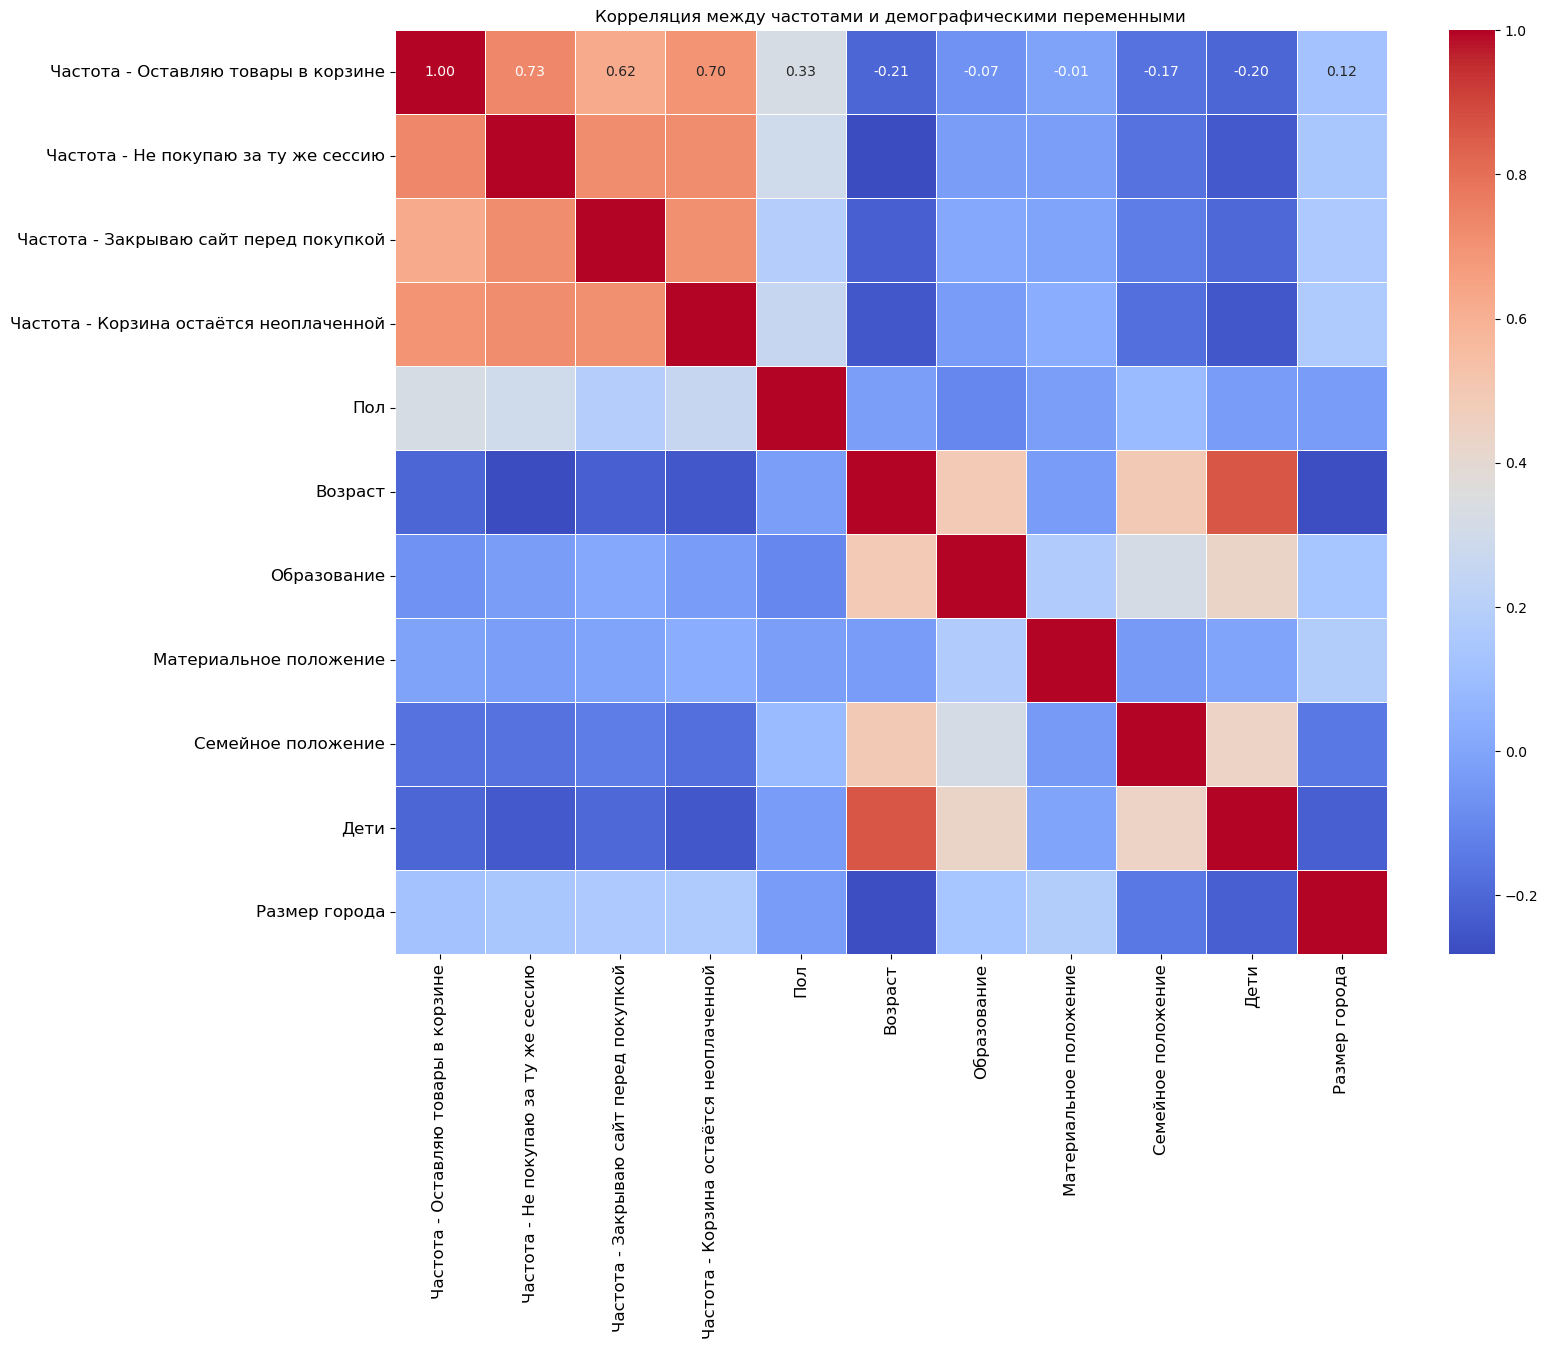

In [20]:
# Выбираем столбцы для частот (например, начинаются с 'Частота') и демографические переменные
frequencies = [col for col in df_quantitative_new.columns if "Частота" in col]
demographics = ['Пол', 'Возраст', 'Образование', 'Материальное положение', 'Семейное положение', 'Дети', 'Размер города']

# Создаем поддатасет, чтобы рассчитать корреляцию только по этим переменным
corr_freq_demo = df_quantitative_new[frequencies + demographics].corr(method='spearman')

plt.figure(figsize=(16, 12))

# Визуализируем корреляцию
sns.heatmap(corr_freq_demo, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Добавляем заголовок
plt.title("Корреляция между частотами и демографическими переменными")
plt.xticks(fontsize=12)  # для оси X
plt.yticks(fontsize=12)  # для оси Y
# Сохраняем график как изображение


# Показываем график
plt.show()


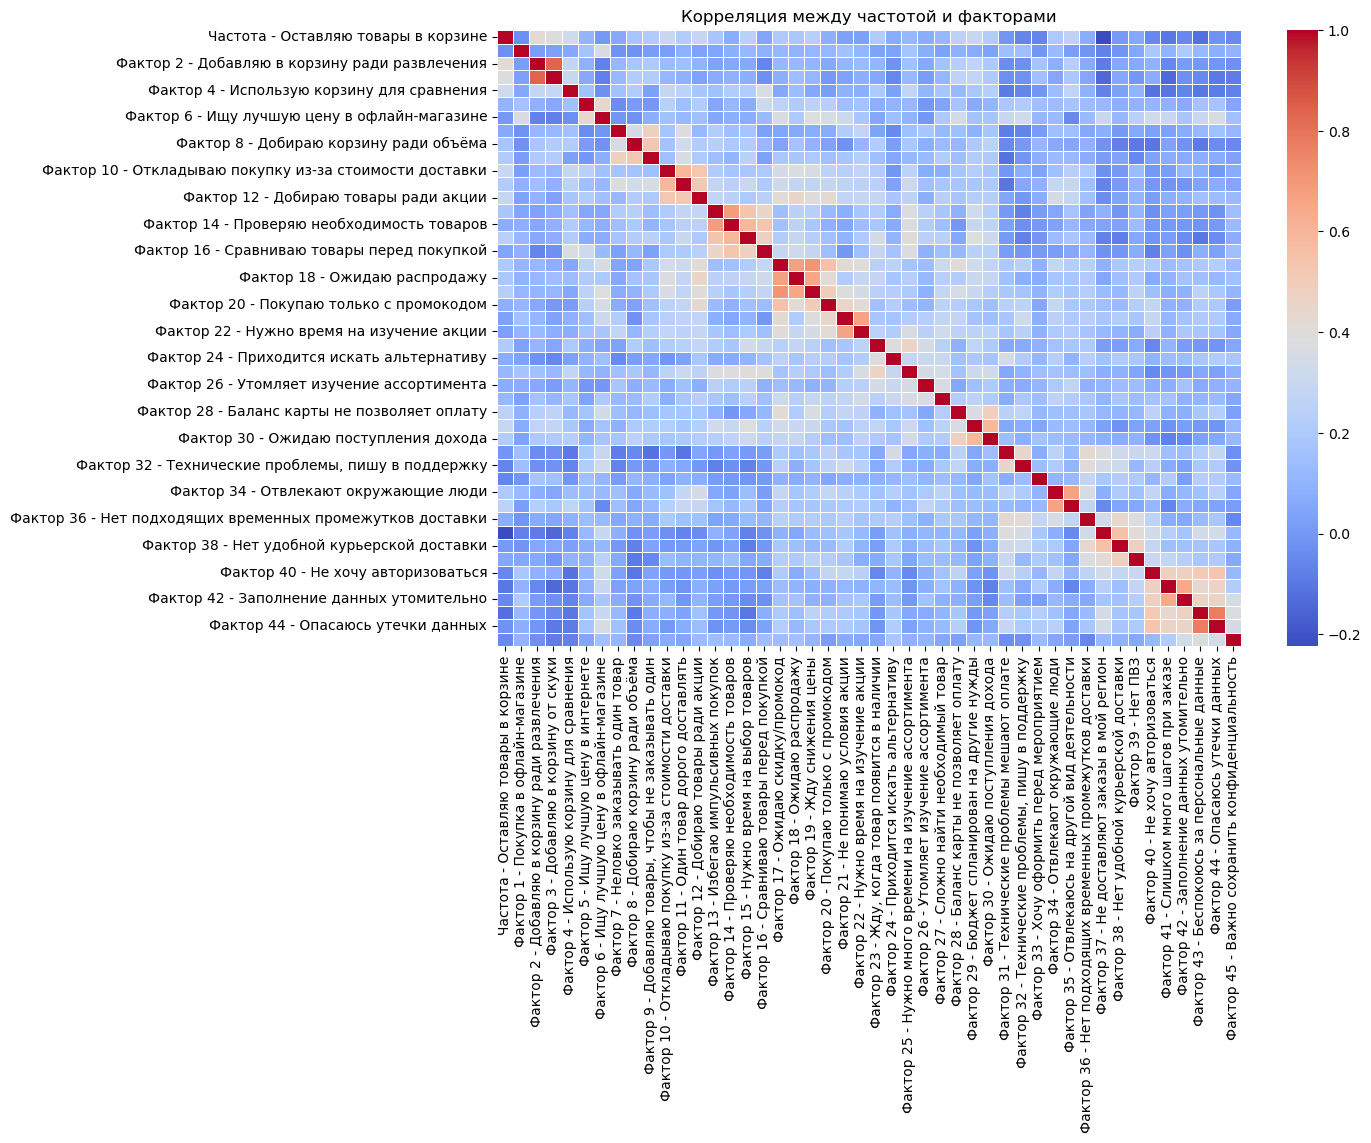

In [21]:
# Выбираем столбцы для частот (например, начинаются с 'Частота') и факторы (например, начинаются с 'Фактор')
#frequencies = [col for col in df_quantitative_new.columns if "Частота" in col]
frequencies = ['Частота - Оставляю товары в корзине']
factors = [col for col in df_quantitative_new.columns if "Фактор" in col]

# Создаем поддатасет, чтобы рассчитать корреляцию между частотами и факторами
corr_freq_factors = df_quantitative_new[frequencies + factors].corr(method='spearman')

# Визуализируем корреляцию между частотами и факторами
plt.figure(figsize=(12, 8))
sns.heatmap(corr_freq_factors, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляция между частотой и факторами")
plt.show()


In [22]:
# Удаляем строки с пропущенными значениями
df_quantitative_clean = df_quantitative_new
df_quantitative_clean.shape
print(df_quantitative_clean.isnull().sum())

Пол                                                          0
Возраст                                                      0
Образование                                                  0
Материальное положение                                       0
Семейное положение                                           9
Дети                                                         0
Размер города                                                6
Частота - Оставляю товары в корзине                          0
Частота - Не покупаю за ту же сессию                         0
Частота - Закрываю сайт перед покупкой                       0
Частота - Корзина остаётся неоплаченной                      0
Фактор 1 - Покупка в офлайн-магазине                         0
Фактор 2 - Добавляю в корзину ради развлечения               0
Фактор 3 - Добавляю в корзину от скуки                       0
Фактор 4 - Использую корзину для сравнения                   0
Фактор 5 - Ищу лучшую цену в интернете                 

In [23]:
df_quantitative_clean = df_quantitative_clean.dropna()
df_quantitative_clean.shape

(189, 56)

In [24]:
df_quantitative_clean

,Пол,Возраст,Образование,Материальное положение,Семейное положение,Дети,Размер города,Частота - Оставляю товары в корзине,Частота - Не покупаю за ту же сессию,Частота - Закрываю сайт перед покупкой,...,Фактор 36 - Нет подходящих временных промежутков доставки,Фактор 37 - Не доставляют заказы в мой регион,Фактор 38 - Нет удобной курьерской доставки,Фактор 39 - Нет ПВЗ,Фактор 40 - Не хочу авторизоваться,Фактор 41 - Слишком много шагов при заказе,Фактор 42 - Заполнение данных утомительно,Фактор 43 - Беспокоюсь за персональные данные,Фактор 44 - Опасаюсь утечки данных,Фактор 45 - Важно сохранить конфиденциальность
0,1,1,3,5,0.0,0,4.0,5,5,5,...,3,2,2,1,2,2,2,2,2,6
1,1,8,2,1,0.0,1,0.0,5,5,5,...,5,6,2,6,6,6,6,6,6,6
2,0,5,4,3,1.0,1,4.0,3,4,4,...,3,2,2,2,2,6,6,6,6,6
3,1,4,4,2,1.0,1,4.0,5,6,5,...,3,2,2,2,2,7,7,7,7,7
4,1,1,3,4,0.0,0,4.0,5,5,5,...,2,2,2,2,2,2,2,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1,3,3,1,1.0,0,3.0,2,5,5,...,5,7,7,7,7,4,4,7,7,7
200,1,1,4,2,0.0,0,4.0,6,5,4,...,5,4,5,5,2,5,5,5,5,6
201,1,2,4,2,1.0,0,4.0,5,5,5,...,5,2,2,5,2,6,6,2,6,4
202,1,2,4,3,2.0,0,2.0,6,5,3,...,1,1,5,5,1,5,5,1,1,5


In [26]:
# Преобразуем столбцы 'Возраст' и 'Образование' в числовые
#df_quantitative_clean.loc[:, 'Возраст'] = pd.to_numeric(df_quantitative_clean['Возраст'], errors='coerce')
#df_quantitative_clean.loc[:, 'Образование'] = pd.to_numeric(df_quantitative_clean['Образование'], errors='coerce')
df_quantitative_clean['Возраст'] = pd.to_numeric(df_quantitative_clean['Возраст'], errors='coerce')
df_quantitative_clean['Образование'] = pd.to_numeric(df_quantitative_clean['Образование'], errors='coerce')
df_quantitative_clean['Пол'] = pd.to_numeric(df_quantitative_clean['Пол'], errors='coerce')

# Проверяем типы данных после преобразования
print(df_quantitative_clean.dtypes)
# Проверим, что столбцы преобразованы
df_quantitative_clean.dtypes


Пол                                                            int64
Возраст                                                        int64
Образование                                                    int64
Материальное положение                                         int64
Семейное положение                                           float64
Дети                                                           int64
Размер города                                                float64
Частота - Оставляю товары в корзине                            int64
Частота - Не покупаю за ту же сессию                           int64
Частота - Закрываю сайт перед покупкой                         int64
Частота - Корзина остаётся неоплаченной                        int64
Фактор 1 - Покупка в офлайн-магазине                           int64
Фактор 2 - Добавляю в корзину ради развлечения                 int64
Фактор 3 - Добавляю в корзину от скуки                         int64
Фактор 4 - Использую корзину для с

D:\$WINDOWS.~TMP\ipykernel_2628\400653854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantitative_clean['Возраст'] = pd.to_numeric(df_quantitative_clean['Возраст'], errors='coerce')
D:\$WINDOWS.~TMP\ipykernel_2628\400653854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantitative_clean['Образование'] = pd.to_numeric(df_quantitative_clean['Образование'], errors='coerce')
D:\$WINDOWS.~TMP\ipykernel_2628\400653854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Пол                                                            int64
Возраст                                                        int64
Образование                                                    int64
Материальное положение                                         int64
Семейное положение                                           float64
Дети                                                           int64
Размер города                                                float64
Частота - Оставляю товары в корзине                            int64
Частота - Не покупаю за ту же сессию                           int64
Частота - Закрываю сайт перед покупкой                         int64
Частота - Корзина остаётся неоплаченной                        int64
Фактор 1 - Покупка в офлайн-магазине                           int64
Фактор 2 - Добавляю в корзину ради развлечения                 int64
Фактор 3 - Добавляю в корзину от скуки                         int64
Фактор 4 - Использую корзину для с

## Регрессионная модель
Нулевая гипотеза (H0):
"Нет значимого влияния демографических факторов (пол, возраст, образование, материальное положение, семейное положение, дети, размер города) на частоту того, оставляют ли пользователи товары в корзине."

Альтернативная гипотеза (H1):
"Демографические факторы (пол, возраст, образование, материальное положение, семейное положение, дети, размер города) оказывают значимое влияние на частоту того, оставляют ли пользователи товары в корзине."

In [28]:
import statsmodels.api as sm
# Задаем зависимую переменную (например, частота оставления товаров в корзине)
y = df_quantitative_clean['Частота - Оставляю товары в корзине']

# Задаем независимые переменные, включая "Пол"
X = df_quantitative_clean[['Пол', 'Возраст', 'Образование', 'Материальное положение', 'Семейное положение', 'Дети', 'Размер города']]

# Добавляем константу
X = sm.add_constant(X)

# Строим модель
model = sm.OLS(y, X)
results = model.fit()

# Выводим результаты
print(results.summary())


                                     OLS Regression Results                                    
Dep. Variable:     Частота - Оставляю товары в корзине   R-squared:                       0.204
Model:                                             OLS   Adj. R-squared:                  0.173
Method:                                  Least Squares   F-statistic:                     6.619
Date:                                 Mon, 03 Mar 2025   Prob (F-statistic):           5.66e-07
Time:                                         20:01:05   Log-Likelihood:                -337.24
No. Observations:                                  189   AIC:                             690.5
Df Residuals:                                      181   BIC:                             716.4
Df Model:                                            7                                         
Covariance Type:                             nonrobust                                         
                             coef    std

R-squared (Коэффициент детерминации): 0.193. Это означает, что около 19.3% изменчивости в переменной "Частота - Оставляю товары в корзине" можно объяснить с помощью выбранных независимых переменных. Это довольно низкий показатель, что может говорить о том, что есть много факторов, которые влияют на частоту оставления товаров в корзине, но они не были учтены в модели.
Adj. R-squared (Скорректированный R-квадрат): 0.159. Этот показатель корректирует R-квадрат с учетом количества независимых переменных в модели. Так как этот показатель не сильно отличается от обычного R-квадрата, это подтверждает, что модель не объясняет большую часть изменчивости в данных.

Константа (const): 2.7318. Это значение показывает, что если все другие переменные равны нулю, то базовый уровень частоты оставления товаров в корзине будет равен 2.73.

Пол (коэффициент 1.8572): Для женщин частота оставления товаров в корзине выше на 1.8572 по сравнению с мужчинами (при прочих равных условиях). Значение p-value для "Пол" — 0.000, что означает, что пол значительно влияет на поведение потребителей.

Возраст (коэффициент -0.1334): С возрастом частота оставления товаров в корзине уменьшается на 0.1334 за каждое увеличение возраста на 1 год. Это означает, что старшие люди менее склонны оставлять товары в корзине. P-value (0.027) подтверждает статистическую значимость этого эффекта.

Образование (коэффициент 0.0863): С увеличением уровня образования частота оставления товаров в корзине увеличивается на 0.0863. Однако p-value для образования — 0.465, что указывает на то, что этот коэффициент не является статистически значимым.

Материальное положение (коэффициент -0.0874): С увеличением материального положения частота оставления товаров в корзине снижается. P-value для этого коэффициента — 0.595, что означает, что этот фактор не имеет статистической значимости в модели.

Семейное положение (коэффициент -0.2087): Люди, состоящие в браке, с большей вероятностью оставляют товары в корзине. Однако p-value (0.553) указывает, что это влияние не является статистически значимым.

Дети (коэффициент -0.0066): Люди с детьми оставляют товары в корзине чуть реже, чем без детей, но этот коэффициент не имеет статистической значимости (p-value = 0.891).

Размер города (коэффициент 0.0713): Люди, проживающие в крупных городах, оставляют товары в корзине немного чаще, чем те, кто живет в малых городах. Однако p-value (0.569) указывает на отсутствие статистической значимости.

Модель показала, что пол и возраст являются статистически значимыми факторами, влияющими на частоту оставления товаров в корзине, с положительным эффектом для женщин и отрицательным для старших возрастных групп. Однако для других факторов (образование, материальное положение, семейное положение, наличие детей, размер города) результаты не были значимыми.

## Кластерный ананлиз

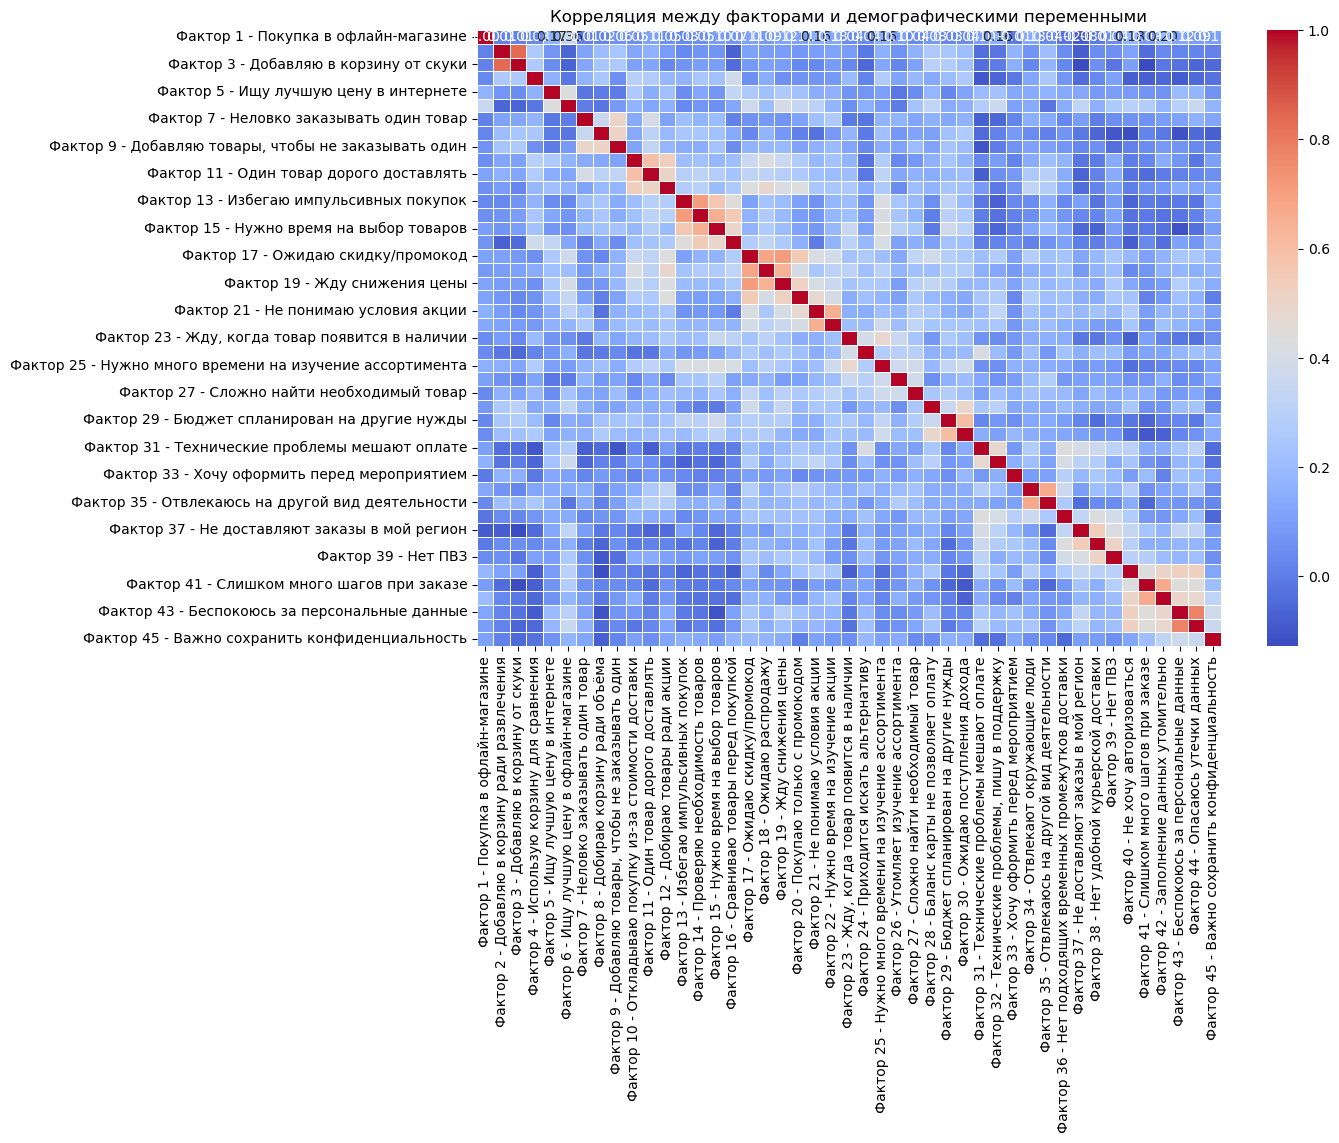

In [29]:
# Выбираем столбцы для факторов (например, начинаются с 'Фактор') и демографические переменные
factors = [col for col in df_quantitative_clean.columns if "Фактор" in col]

# Создаем поддатасет, чтобы рассчитать корреляцию только по этим переменным
corr_factors_demo = df_quantitative_clean[factors].corr(method='spearman')

# Визуализируем корреляцию между факторами и демографией
plt.figure(figsize=(12, 8))
sns.heatmap(corr_factors_demo, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляция между факторами и демографическими переменными")
plt.show()

In [30]:
# Список факторов, которые нужно исключить
exclude_factors = [
    'Фактор 2 - Добавляю в корзину ради развлечения', 
    'Фактор 6 - Ищу лучшую цену в офлайн-магазине',
    'Фактор 8 - Добираю корзину ради объёма', 
    'Фактор 9 - Добавляю товары, чтобы не заказывать один', 
    'Фактор 11 - Один товар дорого доставлять', 
    'Фактор 12 - Добираю товары ради акции',
    'Фактор 14 - Проверяю необходимость товаров', 
    'Фактор 15 - Нужно время на выбор товаров', 
    'Фактор 16 - Сравниваю товары перед покупкой',
    'Фактор 17 - Ожидаю скидку/промокод',
    'Фактор 19 - Жду снижения цены', 
    'Фактор 20 - Покупаю только с промокодом', 
    'Фактор 21 - Не понимаю условия акции', 
    'Фактор 23 - Жду, когда товар появится в наличии',
    'Фактор 24 - Приходится искать альтернативу', 
    'Фактор 25 - Нужно много времени на изучение ассортимента', 
    'Фактор 27 - Сложно найти необходимый товар', 
    'Фактор 29 - Бюджет спланирован на другие нужды', 
    'Фактор 30 - Ожидаю поступления дохода', 
    'Фактор 32 - Технические проблемы, пишу в поддержку',
    'Фактор 34 - Отвлекают окружающие люди', 
    'Фактор 37 - Не доставляют заказы в мой регион', 
    'Фактор 42 - Заполнение данных утомительно', 
    'Фактор 44 - Опасаюсь утечки данных', 
    'Фактор 45 - Важно сохранить конфиденциальность'
]

# Убираем эти столбцы из DataFrame
df_cleaned = df_quantitative_new.drop(columns=exclude_factors)

# Проверяем результат
print(df_cleaned.head())



  Пол Возраст Образование  Материальное положение  Семейное положение  Дети  \
0   1       1           3                       5                 0.0     0   
1   1       8           2                       1                 0.0     1   
2   0       5           4                       3                 1.0     1   
3   1       4           4                       2                 1.0     1   
4   1       1           3                       4                 0.0     0   

   Размер города  Частота - Оставляю товары в корзине  \
0            4.0                                    5   
1            0.0                                    5   
2            4.0                                    3   
3            4.0                                    5   
4            4.0                                    5   

   Частота - Не покупаю за ту же сессию  \
0                                     5   
1                                     5   
2                                     4   
3         

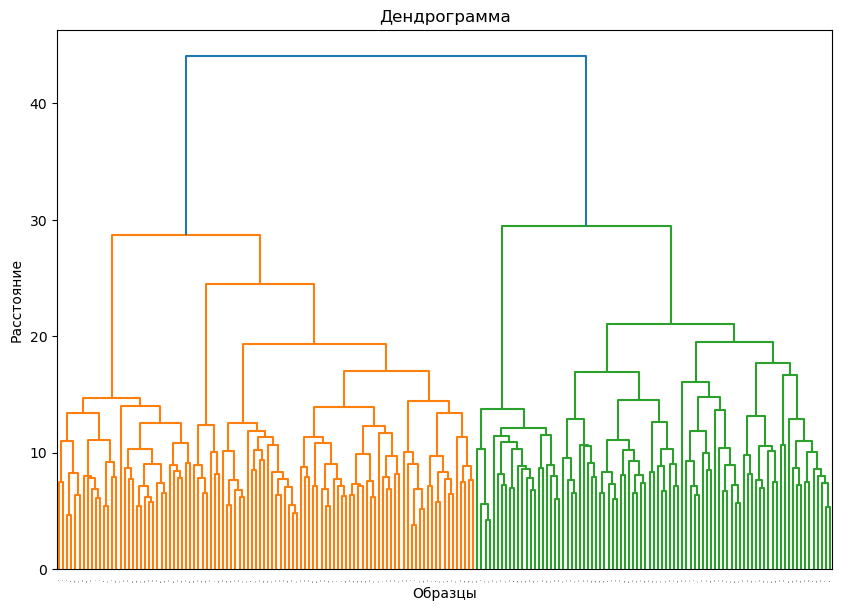

              Пол   Возраст  Образование  Материальное положение  \
Cluster                                                            
0        0.911765  2.666667     3.205882                2.558824   
1        0.833333  3.545455     3.651515                2.954545   
2        0.904762  1.428571     3.238095                3.047619   

         Семейное положение      Дети  Размер города  \
Cluster                                                
0                  0.715686  0.372549       3.401961   
1                  1.166667  0.530303       3.454545   
2                  0.904762  0.047619       3.809524   

         Частота - Оставляю товары в корзине  \
Cluster                                        
0                                   4.735294   
1                                   3.045455   
2                                   4.571429   

         Частота - Не покупаю за ту же сессию  \
Cluster                                         
0                                    4.

C:\Users\NewUser\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
D:\$WINDOWS.~TMP\ipykernel_2628\1838315311.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantitative_clean['Cluster'] = clusters


In [31]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Стандартизируем данные (если нужно)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_quantitative_clean)  # Ваши данные

# Строим дендрограмму для визуализации
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Дендрограмма')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.xticks(fontsize=0)  # для оси X
plt.yticks(fontsize=10)  # для оси Y
plt.savefig(r'D:\Загрузки Chrome\dendogram.png', dpi=300)  # Сохраняем файл с разрешением 300 dpi
plt.show()

# На основе дендрограммы определяем оптимальное количество кластеров
# Например, выбираем 3 кластера (можно изменить в зависимости от анализа дендрограммы)
from sklearn.cluster import AgglomerativeClustering

# Применяем иерархическую кластеризацию
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(X_scaled)

# Добавляем кластер к данным
df_quantitative_clean['Cluster'] = clusters


# Посмотрим на результат
print(df_quantitative_clean.groupby('Cluster').mean())  # Среднее по каждому кластеру


In [33]:
from sklearn.cluster import AgglomerativeClustering

# Создаем модель для кластеризации с 3 кластерами
cluster_model = AgglomerativeClustering(n_clusters=3)

# Применяем кластеризацию к данным
df_quantitative_clean['Cluster'] = cluster_model.fit_predict(X_scaled)

# Просматриваем распределение респондентов по кластерам
print(df_quantitative_clean['Cluster'].value_counts())

# Просмотрим средние значения факторов в каждом кластере
cluster_means = df_quantitative_clean.groupby('Cluster').mean()
print(cluster_means)


Cluster
0    102
1     66
2     21
Name: count, dtype: int64
              Пол   Возраст  Образование  Материальное положение  \
Cluster                                                            
0        0.911765  2.666667     3.205882                2.558824   
1        0.833333  3.545455     3.651515                2.954545   
2        0.904762  1.428571     3.238095                3.047619   

         Семейное положение      Дети  Размер города  \
Cluster                                                
0                  0.715686  0.372549       3.401961   
1                  1.166667  0.530303       3.454545   
2                  0.904762  0.047619       3.809524   

         Частота - Оставляю товары в корзине  \
Cluster                                        
0                                   4.735294   
1                                   3.045455   
2                                   4.571429   

         Частота - Не покупаю за ту же сессию  \
Cluster                    

D:\$WINDOWS.~TMP\ipykernel_2628\1126927977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantitative_clean['Cluster'] = cluster_model.fit_predict(X_scaled)


In [62]:

# Указываем путь для сохранения (добавляем имя файла)
save_path = "D:/Научные статьи/cluster_means.xlsx"

# Сохранение в Excel
with pd.ExcelWriter(save_path) as writer:
    cluster_means.to_excel(writer, sheet_name="Cluster_means", index=False)

print(f"Файл сохранен по пути: {save_path}")


Файл сохранен по пути: D:/Научные статьи/cluster_means.xlsx


In [36]:
from scipy import stats
f_stat, p_val = stats.f_oneway(df_quantitative_clean[df_quantitative_clean['Cluster'] == 0]['Фактор 1 - Покупка в офлайн-магазине'],
                                df_quantitative_clean[df_quantitative_clean['Cluster'] == 1]['Фактор 1 - Покупка в офлайн-магазине'],
                                df_quantitative_clean[df_quantitative_clean['Cluster'] == 2]['Фактор 1 - Покупка в офлайн-магазине'])
print("F-статистика:", f_stat)
print("P-значение:", p_val)


F-статистика: 1.493935786500721
P-значение: 0.227168420157382


In [38]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загрузка датасета (если он уже загружен, пропустите этот шаг)
# df_quantitative_clean = pd.read_csv("your_dataset.csv")  # Если у вас файл CSV

# Проверяем, какие кластеры присутствуют в данных
unique_clusters = df_quantitative_clean['Cluster'].unique()
print(f"Кластеры в данных: {unique_clusters}")

# Разделяем датасет на три отдельных датафрейма по значениям столбца Cluster
cluster_0 = df_quantitative_clean[df_quantitative_clean['Cluster'] == 0]
cluster_1 = df_quantitative_clean[df_quantitative_clean['Cluster'] == 1]
cluster_2 = df_quantitative_clean[df_quantitative_clean['Cluster'] == 2]

# Выводим размерность каждого кластера
print(f"Размер кластера 0: {cluster_0.shape}")
print(f"Размер кластера 1: {cluster_1.shape}")
print(f"Размер кластера 2: {cluster_2.shape}")

# Если нужно сохранить кластеры в отдельные файлы CSV:
# cluster_0.to_csv("cluster_0.csv", index=False)
# cluster_1.to_csv("cluster_1.csv", index=False)
# cluster_2.to_csv("cluster_2.csv", index=False)


Кластеры в данных: [0 1 2]
Размер кластера 0: (102, 57)
Размер кластера 1: (66, 57)
Размер кластера 2: (21, 57)


In [57]:
# Указываем путь для сохранения
save_path = "D:/Научные статьи/"

# Сохранение каждого кластера в отдельный CSV файл
cluster_0.to_csv(save_path + "cluster_0.csv", index=False)
cluster_1.to_csv(save_path + "cluster_1.csv", index=False)
cluster_2.to_csv(save_path + "cluster_2.csv", index=False)

print(f"Файлы сохранены в {save_path}")


Файлы сохранены в D:/Научные статьи/


In [58]:
# Указываем путь для сохранения
save_path = "D:/Научные статьи/clusters.xlsx"

# Сохранение в Excel
with pd.ExcelWriter(save_path) as writer:
    cluster_0.to_excel(writer, sheet_name="Cluster_0", index=False)
    cluster_1.to_excel(writer, sheet_name="Cluster_1", index=False)
    cluster_2.to_excel(writer, sheet_name="Cluster_2", index=False)

print(f"Файл сохранен: {save_path}")


Файл сохранен: D:/Научные статьи/clusters.xlsx
